AI/DL LAB Week 2

Question no 2: Given a structured data set, Design and implement a deep neural network model for classification. Using various test strategies, and hyperparameter tuning, analyze and visualize its performance.

Ashwin Saji(240984006)

In [102]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [98]:
import numpy as np

In [78]:
from keras.datasets import cifar10

In [79]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [80]:
print(f"X_train shape:{X_train.shape}\ny_train shape:{y_train.shape}\nX_test shape:{X_test.shape}\ny_test shape:{y_test.shape}")

X_train shape:(50000, 32, 32, 3)
y_train shape:(50000, 1)
X_test shape:(10000, 32, 32, 3)
y_test shape:(10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
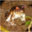

In [81]:
X_train[0]

In [82]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [83]:
# plt.imshow(X_train[0])

In [84]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [85]:
X_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [86]:
# from sklearn.preprocessing import OneHotEncoder

In [87]:
encoder=OneHotEncoder(sparse_output=False)

In [88]:
y_train_encoded=encoder.fit_transform(y_train)
y_test_encoded=encoder.fit_transform(y_test)

In [89]:
y_train_encoded

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [90]:
from tensorflow.keras import layers, models

In [91]:
model=Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(3000, activation='relu'))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [92]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
history=model.fit(X_train_scaled,y_train_encoded,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 334s 213ms/step - accuracy: 0.2810 - loss: 2.1744


In [97]:
model.predict(X_test_scaled)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 231ms/step


array([0.47149223, 0.39691627, 0.6448693 , 0.77932036, 0.4203168 ,
       0.7586877 , 0.44425192, 0.22485937, 0.29644385, 0.18657085],
      dtype=float32)

In [99]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


3

In [100]:
y_test[0]

array([3], dtype=uint8)